In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

plt.figure(dpi=1200)



<Figure size 7680x5760 with 0 Axes>

<Figure size 7680x5760 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt
import csv

def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

# define the true objective function
def second_degree_fit(x, a, b, c):
	return a * x + b * x**2 + c

# define the true objective function
def third_degree_fit(x, a, b, c, d):
	return a * x + b * x**2 + c* x**3 + d 


def plot_results(path, title):
    x = []
    y = []

    with open(path,'r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        for row in lines:
            if float(row[1]) > 50:
                continue
            x.append(int(row[0]))
            y.append((float(row[1])))
            
    y = [x for _, x in sorted(zip(x, y))]
    x = sorted(x)
    df = pd.read_csv(path)

    
#     df = df.sort_values(by=[1])
    
#     df.plot(kind='bar')
            
#     print(f'avg= {sum(y)/len(y)}')
    
    parameters, covariance = curve_fit(second_degree_fit,  np.asarray(x) , np.asarray(y))
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_C = parameters[1]
    
    parameters3, covariance3 = curve_fit(third_degree_fit,  np.asarray(x) , np.asarray(y))
    
    
    x_min = 5
    x_max = max(x)                                #min/max values for x axis
    x_fit = np.linspace(x_min, x_max, 100)   #range of x values used for the fit function
    plt.plot(x_fit, second_degree_fit(x_fit, *parameters), '-', label='Fit_2nd_degree')
    plt.plot(x_fit, third_degree_fit(x_fit, *parameters3), '-', label='Fit_3nd_degree')

    print(f'A: {fit_A}')
    print(f'B: {fit_B}')
    print(f'C: {fit_C}')
    
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
#     poly = np.polyfit(y, x, deg=5)
    plt.style.use('seaborn-whitegrid')
    plt.plot(x, y, 'gx--')
#     plt.plot(np.polyval(poly, x), label='fit')
    plt.xticks(rotation = 25)
    plt.xlabel('size m=n')
    plt.ylabel('MSE')
    plt.title(title, fontsize = 20)
#     plt.grid()
    plt.legend()
    plt.show()


A: -0.007060685692762699
B: 1.2837901970663388e-05
C: 1.2837901970663388e-05


/tmp/ipykernel_41418/2685541753.py:72: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


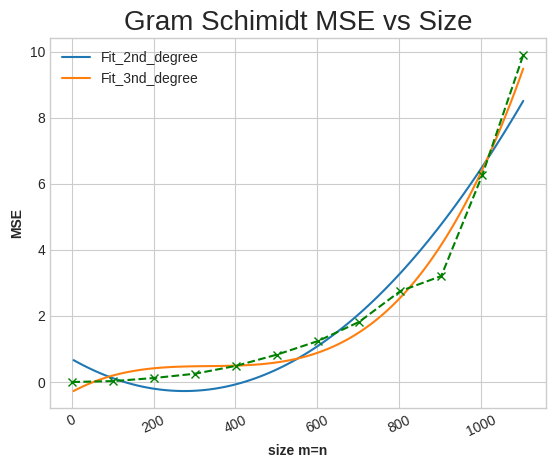

A: -0.02062199319875001
B: 3.722295771446255e-05
C: 3.722295771446255e-05


/tmp/ipykernel_41418/2685541753.py:72: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


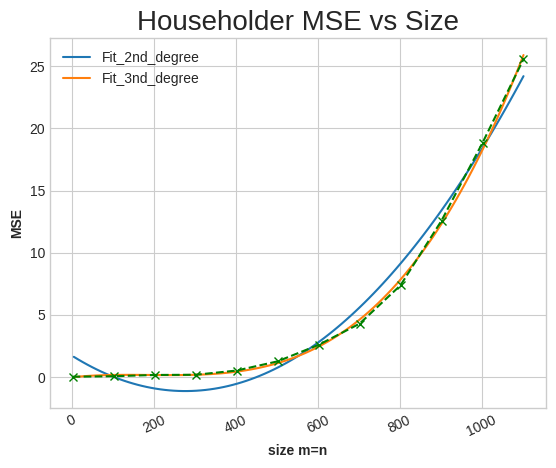

In [60]:
plot_results('test_results/MSE_Gram.txt', 'Gram Schimidt MSE vs Size')

plot_results('test_results/MSE_house.txt', 'Householder MSE vs Size')


# Matrix generation

The matricies are generated using the following code in  `generate_data.py`: 

 ##  Generating random Q and R to produce A for MSE testing:
 ###  `generate_Q_R(length)` 
 using scipy we can create random orthogonal matrix Q and random upper triangular R to get A by the `np.dot(Q, R)`
 
 
 ##   Generating random Dense and Sparce Matricies:
  ###  `generate_dense(length)` 
  ###  `generate_saprce(length)` 
  using `scipy.sparse` to determine the density of the matrix 
    

A: -0.0014982011167463875
B: 5.786408448221758e-06
C: 5.786408448221758e-06


/tmp/ipykernel_41418/1949373173.py:72: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


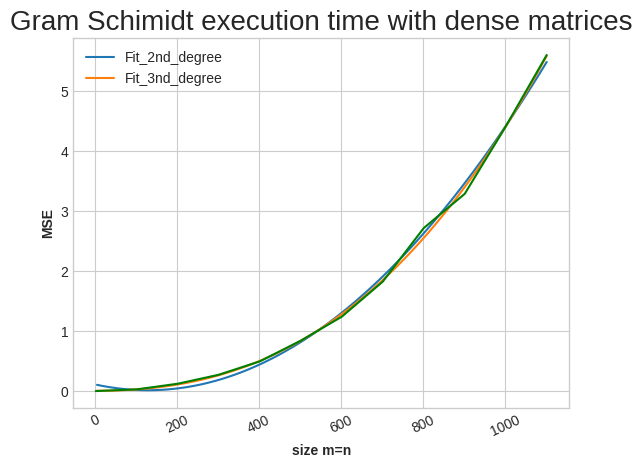

A: -0.021955107007402202
B: 3.8838036459502426e-05
C: 3.8838036459502426e-05


/tmp/ipykernel_41418/1949373173.py:72: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


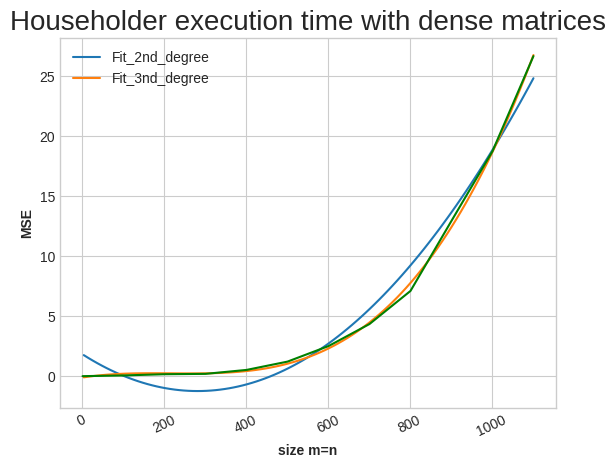

In [50]:
plot_results('test_results/gram_dense_results.txt', 'Gram Schimidt execution time with dense matrices')

plot_results('test_results/house_dense_results.txt', 'Householder execution time with dense matrices')


## testing with sparce data

In [ ]:
plot_results('test_results/gram_sparce_results.txt', 'Gram Schimidt execution time with sparse matrices')
plot_results('test_results/house_sparce_results.txt', 'Householder execution time with sparse matrices')

In [ ]:
plot_results('test_results/gram_sparce_m_results.txt', 'Gram Schimidt execution time with sparse matrices of fixed m=1200')
plot_results('test_results/house_sparce_m_results.txt', 'Householder execution time with sparse matrices of fixed m=1200')


In [ ]:
plot_results('test_results/gram_dense_m_results.txt', 'Gram Schimidt execution time with dense matrices of fixed m=1200')
plot_results('test_results/house_dense_m_results.txt','Householder execution time with dense matrices of fixed m=1200')


In [ ]:
plot_results('test_results/gram_dense_n_results.txt', 'Gram Schimidt execution time with dense matrices of fixed n=2')
plot_results('test_results/house_dense_n_results.txt','Householder execution time with dense matrices of fixed n=2')
